In [1]:
import numpy as np
import os
import pickle
import argparse
import sys
import pdb
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
BASE_DIR = '/root/class/cmu/LSMA/ls-hw1'
DATA_DIR = '/shared/youngkim/dataset'
os.chdir(DATA_DIR)

class args:
    feat_dir = 'avg_pooling/y_scns/'
    feat_dim = 50
    list_videos = os.path.join(DATA_DIR, 'labels/kfold_df.csv')
    output_file = 'models/mfcc-50.svm.multiclass.model'
    feat_appendix = '.csv'
    hidden_dim = 512

In [3]:
df = pd.read_csv(args.list_videos)
len(df), df.head()

(7496,
                              Id  Category  kfold
 0  NjUzNjkxMTk0MzI5NDYwNTA2NA==         0    3.0
 1  LTcxNTE1MDY1Mjc5NzMxMTExNDI=         0    0.0
 2  NTMyNTQxODcwODc5MjU2NDk4NA==         0    3.0
 3  LTY0NjAxNjcyNTUyNDI5Mzc2MTE=         0    1.0
 4  NTgzMjc4Mzk0MjQwMzYyMjA1NQ==         0    1.0)

In [4]:
train_df = df[df.kfold != 4.0].copy().reset_index(drop=True)
train_df, len(train_df)

(                                Id  Category  kfold
 0     NjUzNjkxMTk0MzI5NDYwNTA2NA==         0    3.0
 1     LTcxNTE1MDY1Mjc5NzMxMTExNDI=         0    0.0
 2     NTMyNTQxODcwODc5MjU2NDk4NA==         0    3.0
 3     LTY0NjAxNjcyNTUyNDI5Mzc2MTE=         0    1.0
 4     NTgzMjc4Mzk0MjQwMzYyMjA1NQ==         0    1.0
 ...                            ...       ...    ...
 5992  NTcyMTgwOTU4NjUxMjE2NTIwMA==        14    0.0
 5993  LTUxMTQ5Mjg2OTQyNjgyMTc1NzA=        14    1.0
 5994  NDA2NjM0NDg5MDc3NzM3NjQ5OA==        14    0.0
 5995  LTEwMzgyODQzNTYwMjM5NDY3NzI=        14    0.0
 5996  LTQzOTI1MDQ1OTQ3NzUyMjQ4Mg==        14    3.0
 
 [5997 rows x 3 columns],
 5997)

In [5]:
val_df = df[df.kfold == 4.0].copy().reset_index(drop=True)
val_df, len(val_df)

(                                Id  Category  kfold
 0     LTc3NzAzMjA5ODk0ODc0OTQyNDI=         0    4.0
 1     MTY2MDM5NzQ4NTYyMDU5MDcxNA==         0    4.0
 2     LTc2MjMwNzM2OTM0NDg3NzM1Njk=         0    4.0
 3     NjIyOTQ3MTMyOTk4OTQyNDg3Mw==         0    4.0
 4     LTQ1NDc0MzE1MzIxOTU0NzYwMzg=         0    4.0
 ...                            ...       ...    ...
 1494  LTIxNzI4NzM0ODQwMTY3MzYzMjg=        14    4.0
 1495  Mjc4NDk1MTYyNjI1MTU2OTM5OA==        14    4.0
 1496  ODkzMDk5NjEzODg2Njk5MjY3OA==        14    4.0
 1497  LTcxMzIwMDY2OTM1MDM0OTgwMDI=        14    4.0
 1498  LTIwMTA2OTMzMjU2MzMyNzExMDA=        14    4.0
 
 [1499 rows x 3 columns],
 1499)

In [6]:
train_feat_list, train_label_list = [], []

for video_id, label in zip(train_df.Id, train_df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        train_feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        train_label_list.append(int(label))
    else:
        print(video_id)

In [7]:
train_y = np.array(train_label_list)
train_X = np.array(train_feat_list)

In [8]:
train_X.shape

(5997, 401)

In [9]:
val_feat_list, val_label_list = [], []

for video_id, label in zip(val_df.Id, val_df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        val_feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        val_label_list.append(int(label))
    else:
        print(video_id)

val_y = np.array(val_label_list)
val_X = np.array(val_feat_list)

In [10]:
feat_list, label_list = [], []

for video_id, label in zip(df.Id, df.Category):
    feat_filepath = os.path.join(args.feat_dir, video_id+args.feat_appendix)
    if os.path.exists(feat_filepath):
        feat_list.append(np.genfromtxt(feat_filepath, delimiter=";", dtype="float"))
        label_list.append(int(label))
    else:
        print(video_id)

y = np.array(label_list)
X = np.array(feat_list)

In [11]:
clf = MLPClassifier(hidden_layer_sizes=args.hidden_dim,
                    activation="relu",
                    solver="adam",
                    alpha=1e-3)
result = pd.DataFrame(cross_validate(clf, X, y, cv =5))
print(result)
print('mean of cross validation: ', np.mean(result.test_score))

/root/anaconda3/envs/torch18/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


     fit_time  score_time  test_score
0   97.786199    0.215127    0.537333
1  110.035194    0.021938    0.509673
2  116.382237    0.040859    0.522348
3  115.050632    0.021691    0.534356
4  195.095177    0.297443    0.513009
mean of cross validation:  0.5233439181676673


In [12]:
clf = MLPClassifier(activation="relu",
                    solver='adam',
                    early_stopping=True)
parameters = {'hidden_layer_sizes': [512, 1024], 
              'alpha': [1e-2, 1e-3, 1e-4]}

grid_svm = GridSearchCV(clf, param_grid=parameters)

grid_svm.fit(X, y)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,alpha,hidden_layer_sizes,mean_test_score
2,0.0010,512,0.502799
4,0.0001,512,0.495065
3,0.0010,1024,0.493861
1,0.0100,1024,0.493462
5,0.0001,1024,0.491197
0,0.0100,512,0.485057


In [13]:
clf = MLPClassifier(hidden_layer_sizes=args.hidden_dim,
                    activation="relu",
                    solver="adam",
                    alpha=1e-3)
clf.fit(train_X, train_y)

/root/anaconda3/envs/torch18/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=512, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
val_pred = clf.predict(val_X)
print(f"prediction accuracy: {np.mean(val_pred == val_y):.4f}")
cf_matrix = confusion_matrix(val_y, val_pred)
cf_matrix


prediction accuracy: 0.5477


array([[50,  1, 17,  5,  3,  1,  0,  1,  0,  0,  0,  1,  3,  1, 17],
       [ 0, 57,  7,  1,  4,  1, 11,  2,  3,  0,  0,  5,  1,  8,  0],
       [ 6,  1, 44, 11,  2,  5,  3,  1,  0,  3,  0,  3,  1,  0, 19],
       [ 5,  0,  6, 47,  5,  4,  7,  2,  0,  2,  0,  5,  2,  0, 15],
       [ 1,  4,  6,  4, 63,  2,  7,  1,  1,  0,  0,  9,  1,  0,  1],
       [ 1,  1,  4,  3,  5, 52,  8,  9,  1,  4,  0, 11,  1,  0,  0],
       [ 0,  4,  1,  1,  1,  1, 69,  7,  2,  4,  0,  6,  2,  2,  0],
       [ 0,  1,  3,  3,  0,  3, 26, 48,  2,  1,  0,  8,  1,  2,  2],
       [ 1,  3,  1,  0,  1,  0, 10,  0, 67,  5,  2,  0,  2,  6,  2],
       [ 3,  1,  3,  1,  1,  1, 12,  1,  6, 39, 22,  0,  3,  3,  4],
       [ 5,  0,  5,  2,  0,  0,  2,  0,  2,  9, 69,  2,  1,  0,  3],
       [ 0,  4,  2,  2,  5,  4, 12, 14,  1,  3,  0, 50,  1,  0,  2],
       [ 9,  2,  4,  2,  3,  2,  5,  0,  9, 22,  7,  0, 26,  0,  9],
       [ 0,  5,  1,  0,  1,  3,  3,  1,  9,  3,  0,  0,  1, 73,  0],
       [ 3,  0,  8,  8,  1,  2,  1

<AxesSubplot:>

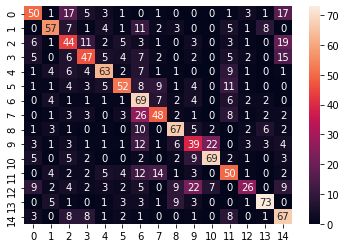

In [17]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)